In [2]:
from statsmodels.tsa.statespace.tools import diff
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)

In [6]:
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


# Stationary and Non-Stationary Data

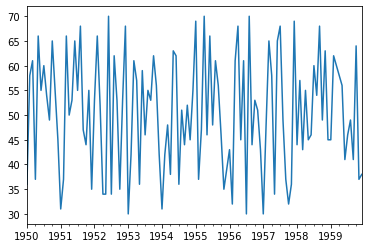

In [13]:
#stationary Data
df.a.plot();

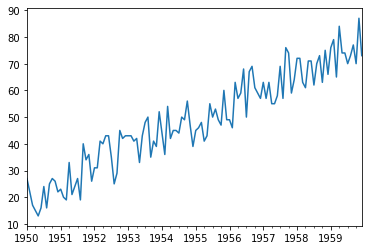

In [12]:
#NOnStationary Data
df.b.plot();

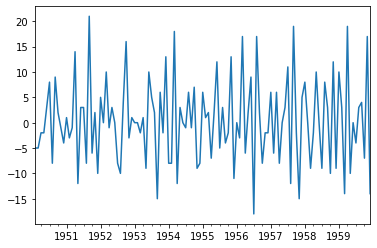

In [11]:
# Non-Sattionary to Stationary using Differencing (here 1st Order)
diff(df.b,k_diff=1).plot();

# ACF and PACF

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf,acovf,pacf_yw,pacf_ols

In [15]:
# Load a non-stationary dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [16]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
acf(df1['Thousands of Passengers'],nlags=5)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997])

In [35]:
pacf(df1['Thousands of Passengers'],nlags=5, method='ywunbiased')

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579])

# Lag plots

In [19]:
from pandas.plotting import lag_plot

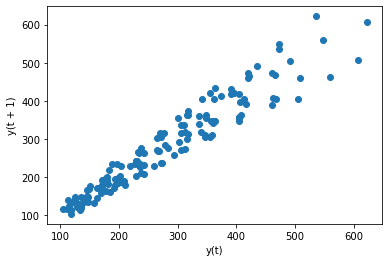

In [21]:
lag_plot(df1['Thousands of Passengers']); #shows lag is highly correlated...Non-Stationary Data

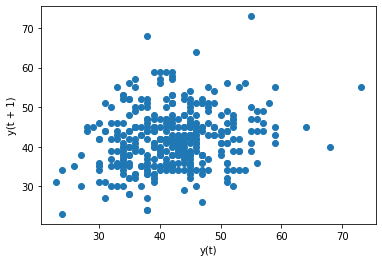

In [23]:
lag_plot(df2['Births']); # NOt Correlated

# ACF Plots

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

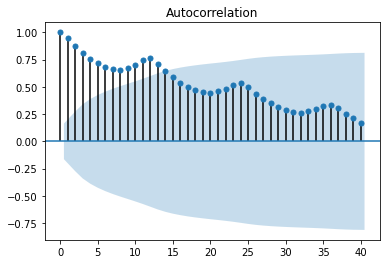

In [26]:
plot_acf(df1,lags=40); 

Clear indication of Seasonality in the Non-Stationary data

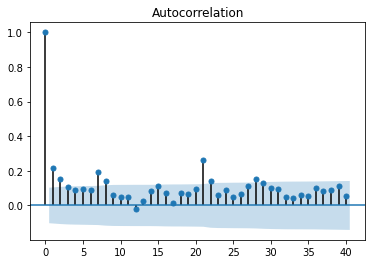

In [28]:
plot_acf(df2,lags=40);

Sharp drop off beacuse of Stationary Data

# PACF Plots

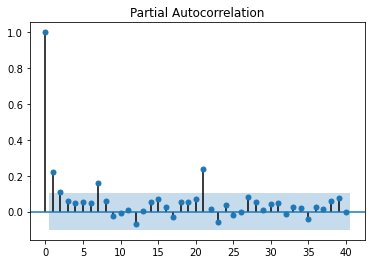

In [36]:
plot_pacf(df2,lags=40); # Works best with Stationary Data